# Architecture Diagram

In [1]:
!pip install diagrams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 28.2 MB/s eta 0:00:00


In [2]:
!pwd

/content


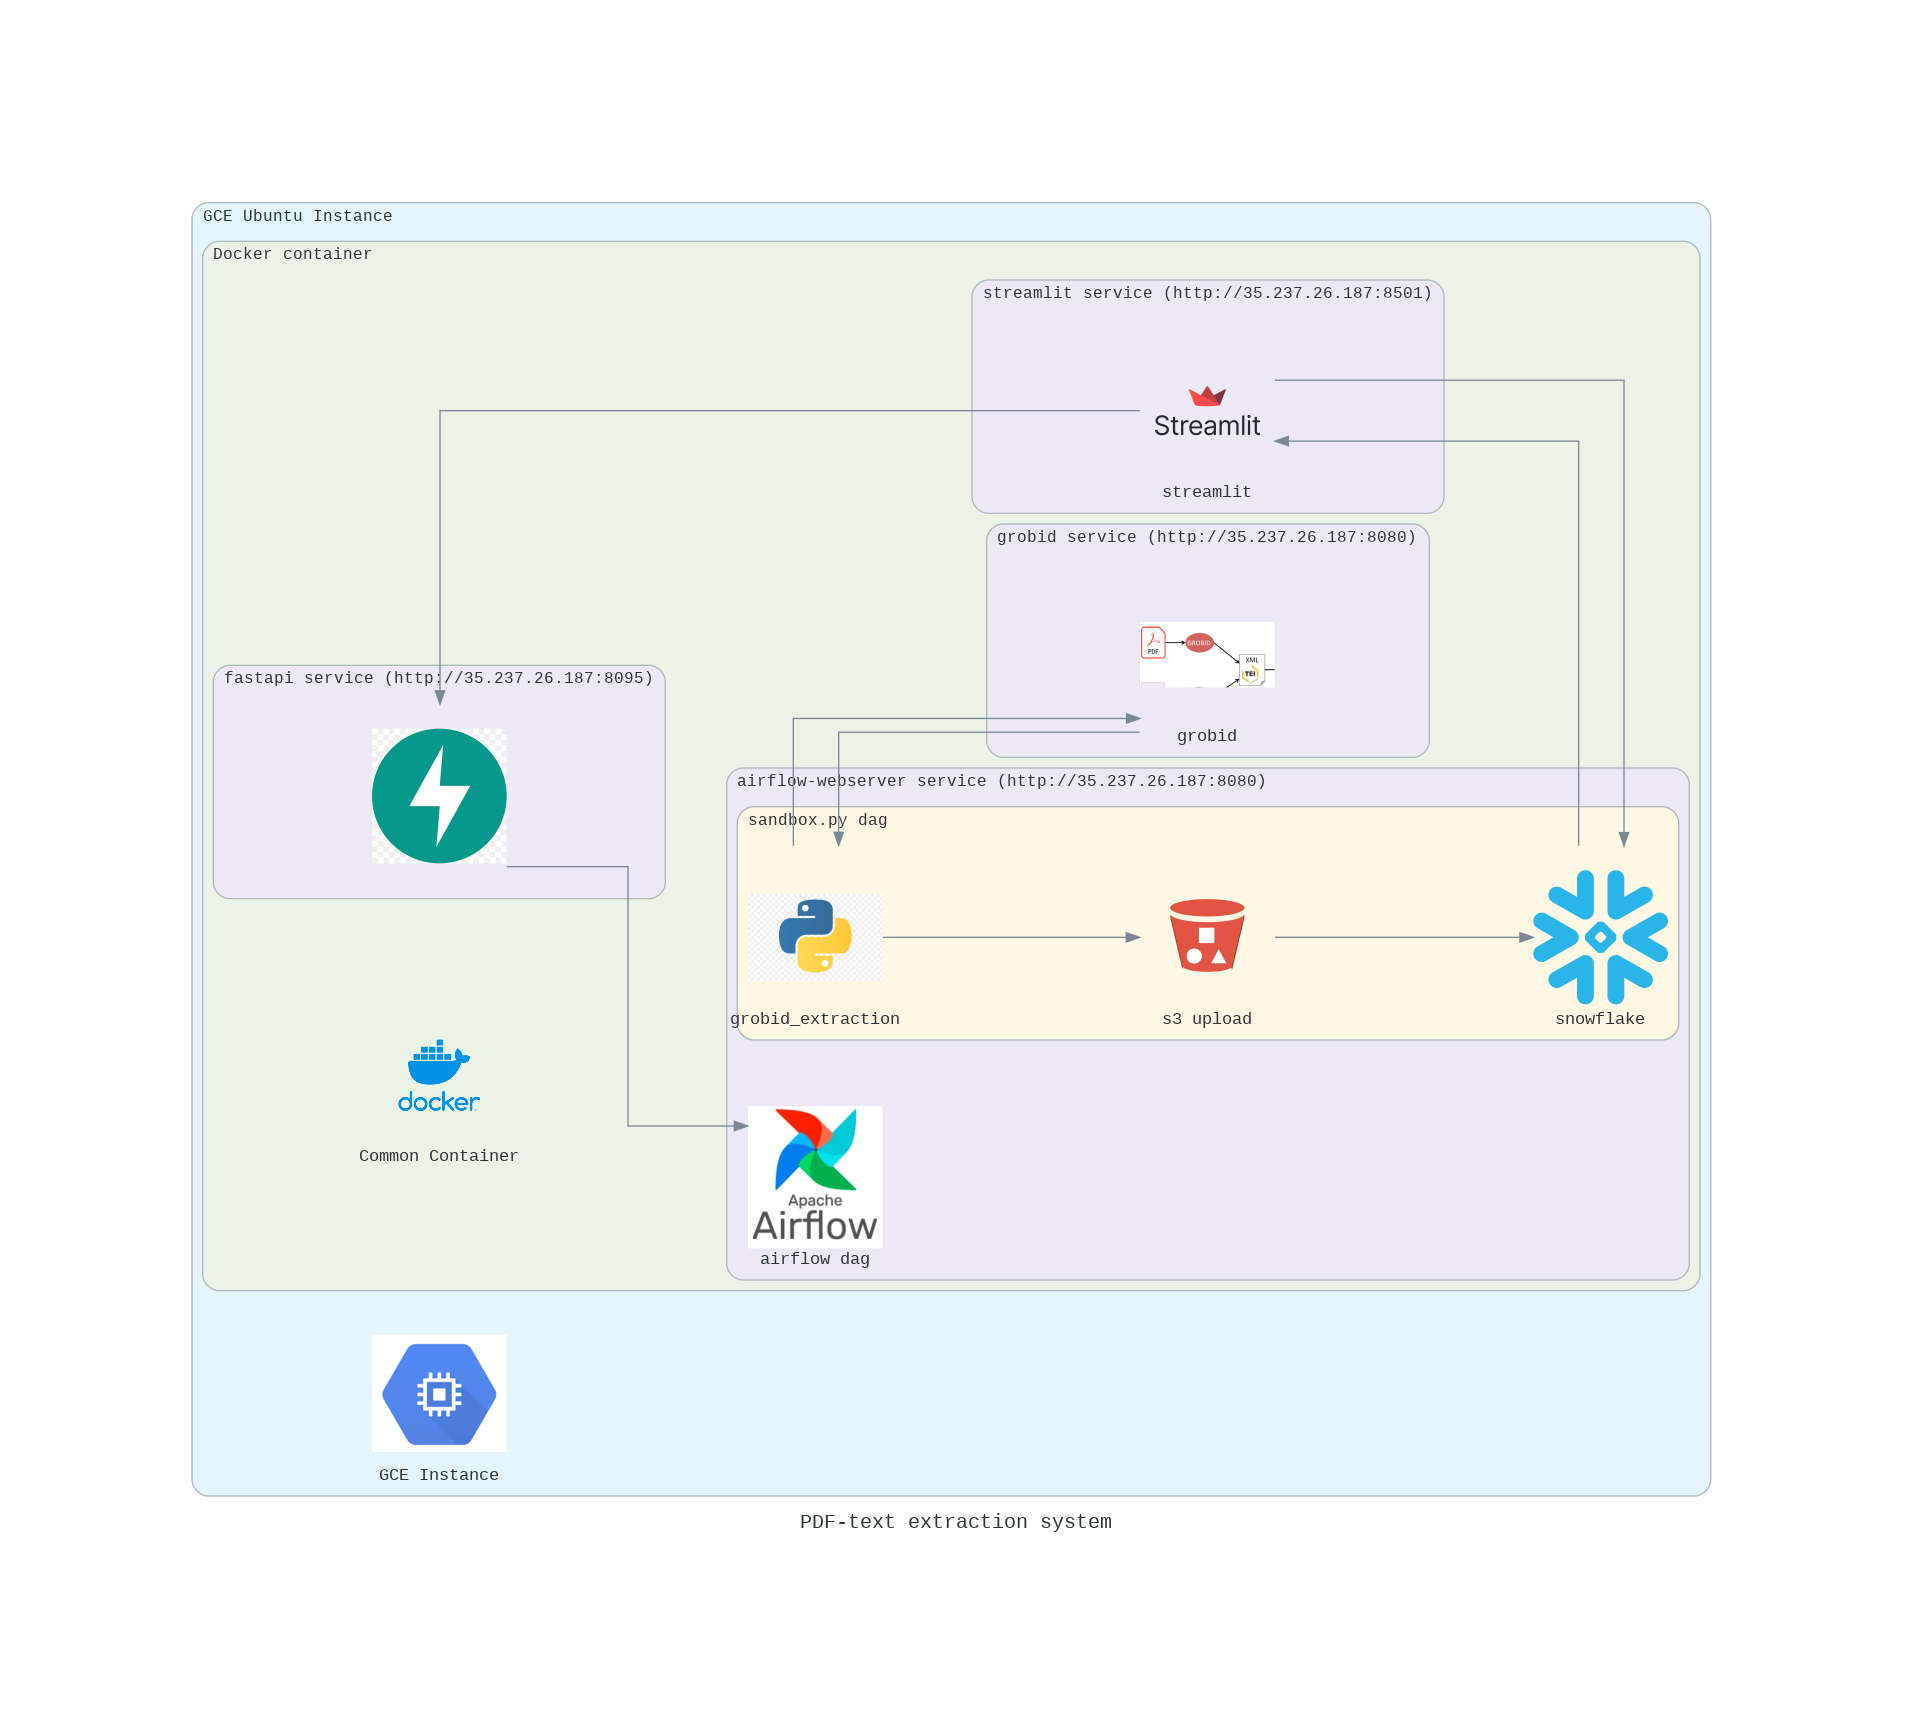

In [23]:
from diagrams import Cluster, Diagram
from diagrams.aws.compute import ECS
from diagrams.programming.language import Python
from diagrams.aws.storage import S3
from diagrams.saas.analytics import Snowflake
from diagrams.custom import Custom

with Diagram("PDF-text extraction system", show=False, direction="LR", filename="architecture") as diag:


    with Cluster("GCE Ubuntu Instance"):
          gce_instance = Custom("GCE Instance", "sample_data/gcp.png")
          with Cluster("Docker container"):
            docker_container = Custom("Common Container", "sample_data/docker.png")

            with Cluster("fastapi service (http://35.237.26.187:8095)"):
              fastapi = Custom("", "sample_data/fastapi.png")

            with Cluster("streamlit service (http://35.237.26.187:8501)"):
            # docker_container = Custom("Contai", "sample_data/docker.png")
              streamlit = Custom("streamlit", "sample_data/streamlit.png")

            with Cluster("grobid service (http://35.237.26.187:8080)"):
              grobid = Custom("grobid", "sample_data/grobid.png")

            with Cluster("airflow-webserver service (http://35.237.26.187:8080)"):
              airflow = Custom("airflow dag", "sample_data/airflow.jpeg")
              with Cluster("sandbox.py dag"):
                grobid_extracton = Custom("grobid_extraction", "sample_data/python.jpg")
                s3_upload = Custom("s3 upload", "sample_data/s3.png")
                s3_to_snowflake = Custom("snowflake", "sample_data/snowflake.png")
                grobid_extracton >> grobid
                grobid >> grobid_extracton
                grobid_extracton >> s3_upload
                s3_upload>>s3_to_snowflake
          # gce_instance = Custom("GCE Instance", "sample_data/gcp.png")


    streamlit >> fastapi
    fastapi >> airflow
    streamlit >> s3_to_snowflake
    s3_to_snowflake >> streamlit

diag

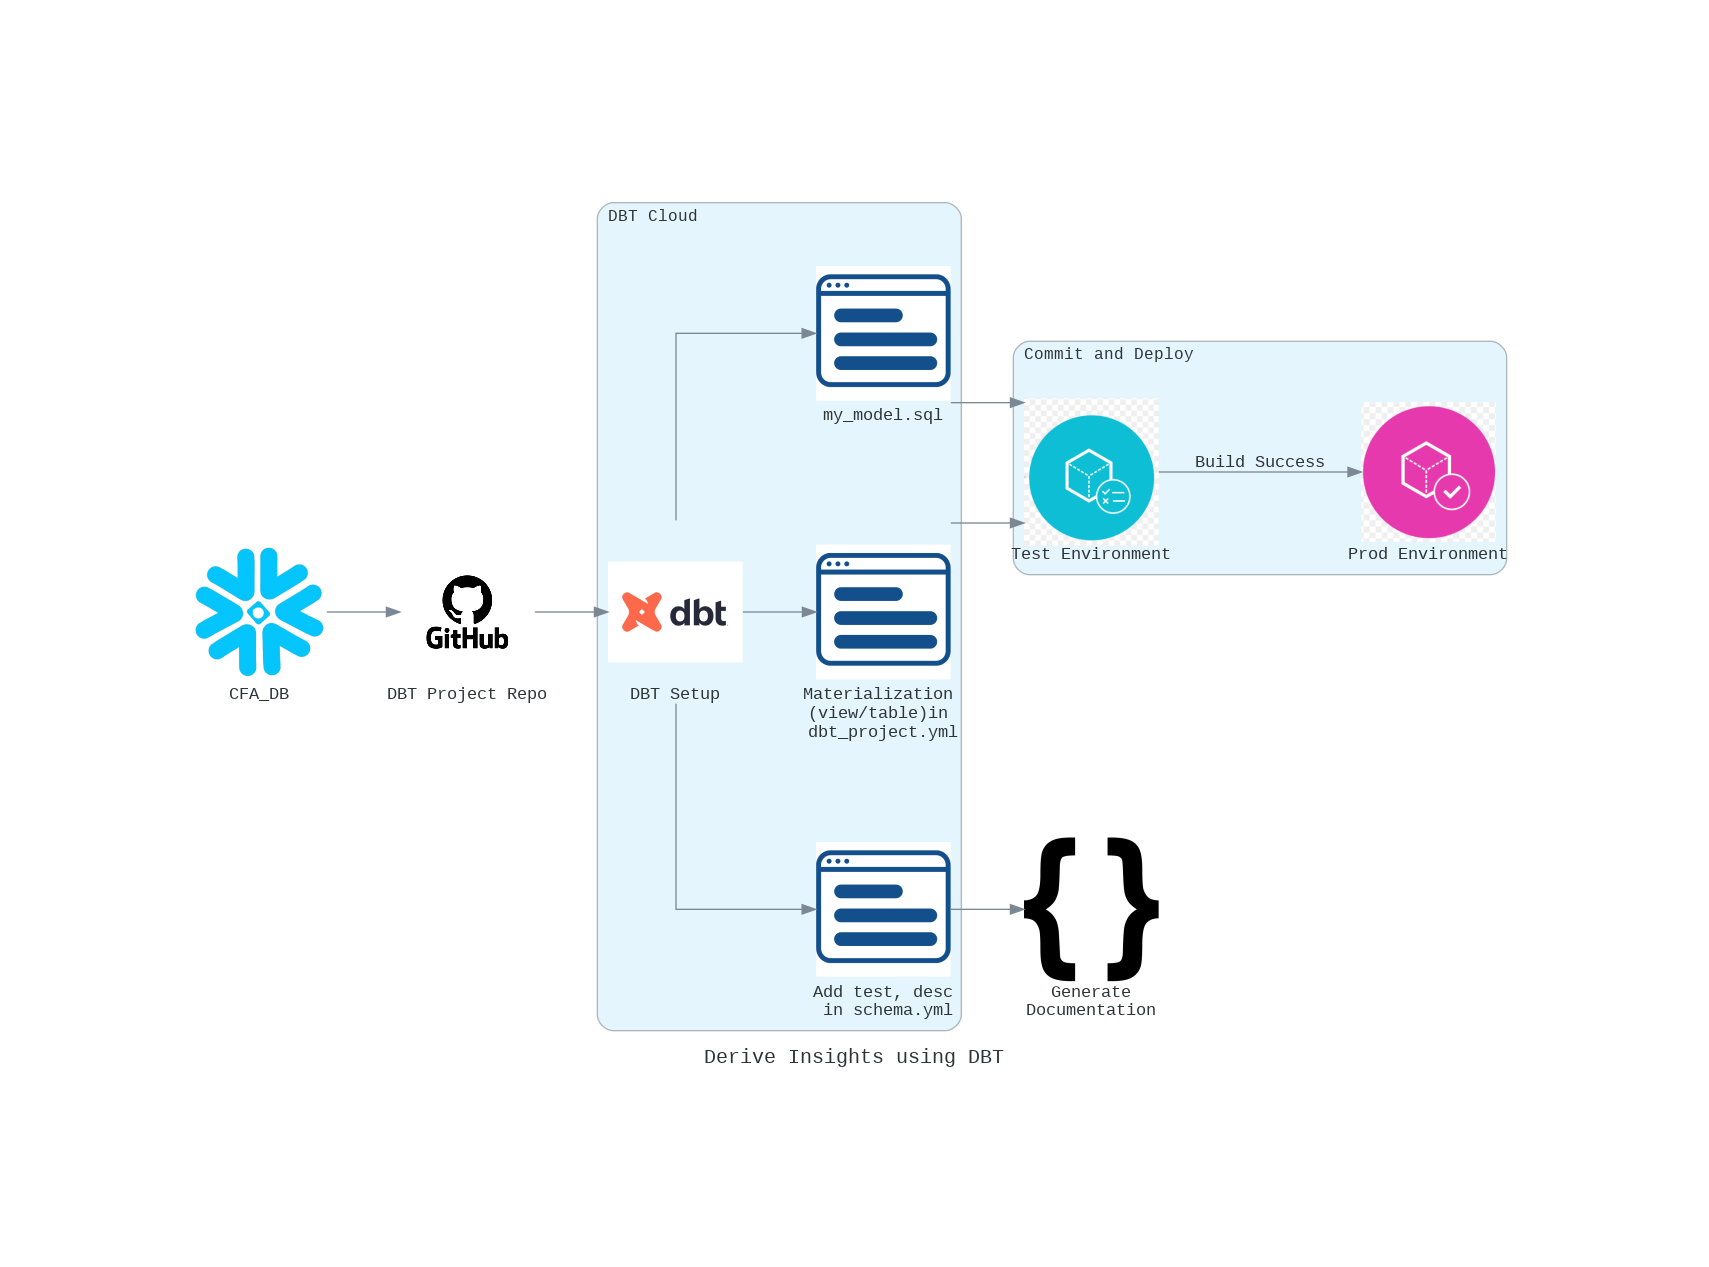

In [ ]:
from diagrams import Cluster, Diagram, Edge
from diagrams.aws.compute import ECS
from diagrams.programming.language import Python
from diagrams.aws.storage import S3
from diagrams.saas.analytics import Snowflake
from diagrams.custom import Custom

with Diagram("Derive Insights using DBT", show=False, direction="LR", filename="architecture") as diag:

    snowflake = Snowflake("CFA_DB")
    github = Custom("DBT Project Repo", "sample_data/github.png")
    # dbt = Custom("DBT Setup", "sample_data/dbt.jpg")
    # myModelSql = Custom("my_model.sql", "sample_data/3.png")
    # materialization =  Custom("Materialization (view/table) in dbt_project.yml", "sample_data/3.png")
    # testAndDescription = Custom("Add test, description in schema.yml", "sample_data/3.png")
    success = Edge(label="Build Success")
    generateDocumentation = Custom("Generate\nDocumentation", "sample_data/brackets-coding-icon.png")
    with Cluster("DBT Cloud"):
        dbt = Custom("DBT Setup", "sample_data/dbt.jpg")
        myModelSql = Custom("my_model.sql", "sample_data/3.png")
        materialization =  Custom("Materialization \n(view/table)in \ndbt_project.yml", "sample_data/3.png")
        testAndDescription = Custom("Add test, desc\n in schema.yml", "sample_data/3.png")
    with Cluster("Commit and Deploy"):
        testingEnv = Custom("Test Environment", "sample_data/test.png")
        prodEnv = Custom("Prod Environment", "sample_data/prod.png")

    snowflake >> github
    github >> dbt
    dbt >> myModelSql
    dbt >> materialization
    dbt >> testAndDescription
    myModelSql >> testingEnv
    materialization >> testingEnv
    testAndDescription >> generateDocumentation
    testingEnv >> success
    success >> prodEnv


diag